[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW8.ipynb)

**Prooblem 1:** Rent prices are of high interest to many people right now. Being able to predict rent well is important. Load in a data set of rental prices in India using the following command.

pd.read_csv("https://richardson.byu.edu/220/rent.csv")

The variables are, in order: BHK - number of bedrooms, Rent - rental fees, Size - square feet of space, AreaType - carpet or super, City, Furnished Status - furnished or unfurnished, Preferred - type of renter sought, Bathrooms, and Who to Contact.

Rent is the target variable. All other variables can be used as predictors.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

In [3]:
rent = pd.read_csv("https://richardson.byu.edu/220/rent.csv")
rent.head()

,BHK,Rent,Size,AreaType,City,FurnishingStatus,Preferred,Bathroom,Contact
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner


Part a. Determine what each variable is, numeric or categorical, and if they are categorical if they are binary or not.

 BHK - number of bedrooms: Numerical

 Rent - rental fees: Numerical

 Size - square feet of space: Numerical

 AreaType - carpet or super: Categorical (Binary)

 City: Categorical (non binary)

 Furnished Status - furnished or unfurnished Categorical (Binary)

 Preferred - type of renter sought: Categorical (non binary)

 Bathrooms: Numerical

 Who to Contact: Categorical (non binary)

Part b. Plot the target variable, Rent. Does it look skewed right or symmetric?

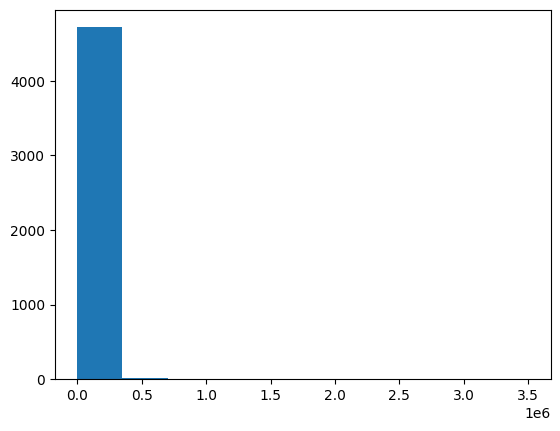

In [4]:
values = rent['Rent']
plt.hist(values)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel("Rent")
plt.ylabel("Frequency")
plt.title("Distribution of Rent")
plt.show()

The plot of rent values is right skewed.

Part c. Fit a regression model with rent as the target and the other variables as predictors.

In [5]:
formula = "Rent ~ BHK + Size + AreaType + City + FurnishingStatus + Preferred + Bathroom + Contact"

model = smf.ols(formula=formula, data=rent).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Rent   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     156.7
Date:                Thu, 20 Nov 2025   Prob (F-statistic):               0.00
Time:                        22:03:28   Log-Likelihood:                -59261.
No. Observations:                4743   AIC:                         1.186e+05
Df Residuals:                    4728   BIC:                         1.186e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

Part d. Plot the fitted values versus the residuals. Does it look like it could use a log transformation.

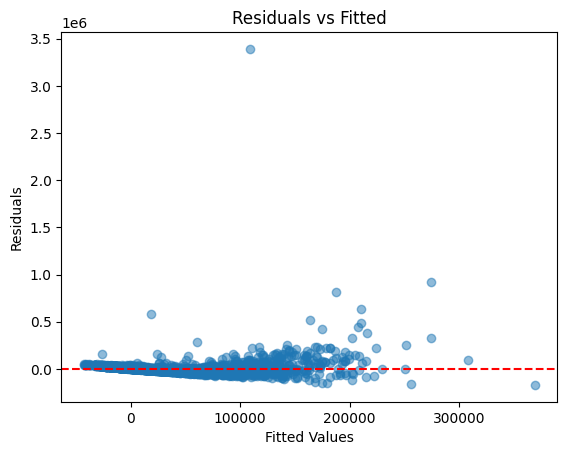

In [7]:
fitted = model.fittedvalues
residuals = model.resid

plt.scatter(fitted, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()


Because the Residuals vs Fitted graph has a pattern (fan shaped) it would benefit from a log transform.

**Problem 2** Work with the log of rent.

Part a. Plot the log rent. Does it loook more or less symmetric?

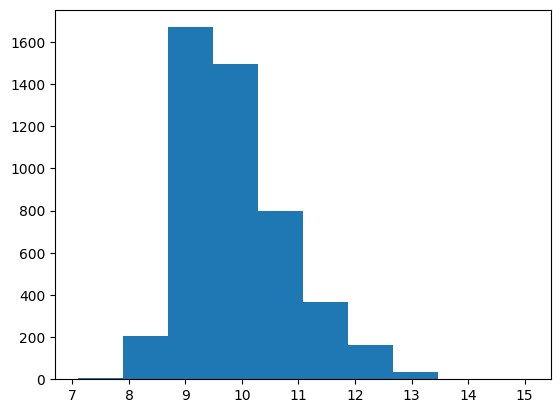

In [8]:
log_values = np.log(rent['Rent'])
plt.hist(log_values)
plt.show()

Part b. Fit a regression model with log rent as the target and the other variables as predictors.

Part c. Plot the fitted values versus residuals. Does this look any better?

Part d. Use out of sample R^2 too determine which model is better.

**Problem 3** Check if predictors need a log transformation.

Part a. Fit another model where the predictor variable Size is given a log transformation as well as Rent.

Part b. Compare the p value Size in the model where Size is untransformed against the p value for log Size in the model with log Size. Is one or both significant.

Part c. Check out of sample R^2 in both models. Does taking the log of size improve the model?

**Problem 4** Use the same Rent data to explore standardizing.

Part a. Use the data set with log Rent. Standardize the training data and fit a linear regression model.

Part b. Check the p-values for the variables in this model against the model without standardization. Are there any differences?

Part c. Use the standardization on the test set and make predictions for the model. Transform those predictions back to the original (log)scale.

**Problem 4**: The data set machine.csv can be loaded using the code

machine = pd.read_csv("https://richardson.byu.edu/220/machine.csv")

The target variable is the cost to maintain a certain type of energy production machinery. The predictors are weight of the machine, the attitude of the region the machine is located towards coal and oil refinery, the type of machine (front or back loading) and the industry the machine is in (coal or oil).

**Part a.** Build and tune a linear regression model to predict the target variable, Cost, using all the other variables besides car_name as predictors.  Tune the model so that only significant features remain.

**Part b.** Plot the Cost of the machine against Weight. Distinguish the color of each. point based on the type of Industry. Repeat this to make plots for Cost against Weight with colors distinguished for attitude and machine type.

**Part c.** Try building a model with only Weight, Industry, and an interaction between Wieght and Industry as predictors. Interpret the meaning of the coefficients in this case.

**Part d.** Plot the fitted regression lines for the model in Part c on top of the plot between Weight and Cost, with the data colored according to Industry.

**Problem 5.**

**Part a.** For the model created in Problem 4a, using all the variables in the model tuned to significant features, report the out of sample R^2 value.

**Part b**. Start with a model with all the predictors. Add in Weight^2 and interactions between weight and each other predictor. Tune the model to keep only significant features. Report the out of sample R^2 for this model.